In [1]:
import numpy as np
import matplotlib as plt
import networkx as nx
import numpy as np
from scipy.linalg import expm

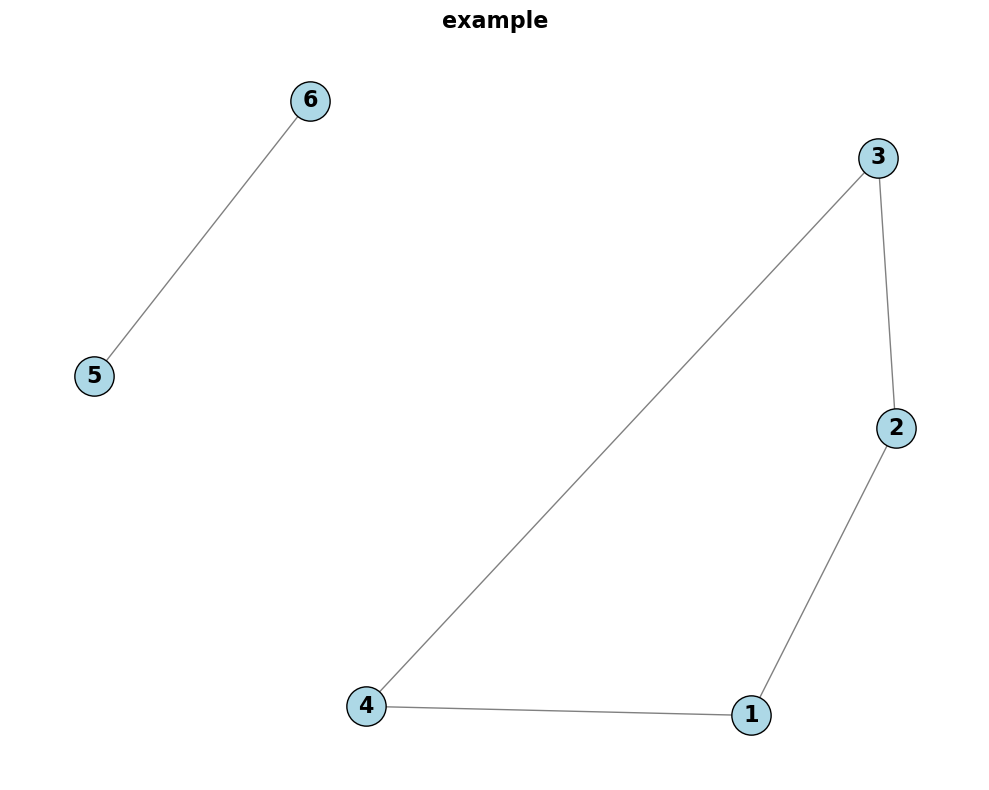

In [11]:
# 设置图形布局
pos = nx.spring_layout(G, k=3, iterations=50)

# 绘制图形
plt.figure(figsize=(10, 8))

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue", edgecolors="black")

# 绘制边
nx.draw_networkx_edges(G, pos, edge_color="gray", 
                       arrows=False, arrowsize=20, 
                       arrowstyle="->", 
                       connectionstyle="arc3,rad=0.1")

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=16, font_weight="bold")

# 设置标题和坐标轴
plt.title("example", fontsize=16, fontweight="bold")
plt.axis("off")

# 显示图形
plt.tight_layout()
plt.show()

(a) 计算图拉普拉斯矩阵 L
拉普拉斯矩阵 L:
[[ 2 -1  0 -1  0  0]
 [-1  2 -1  0  0  0]
 [ 0 -1  2 -1  0  0]
 [-1  0 -1  2  0  0]
 [ 0  0  0  0  1 -1]
 [ 0  0  0  0 -1  1]]

(b) 计算 L 的特征值
特征值: [-0.  2.  4.  2.  2.  0.]

(c) 绘制 x(t) 曲线


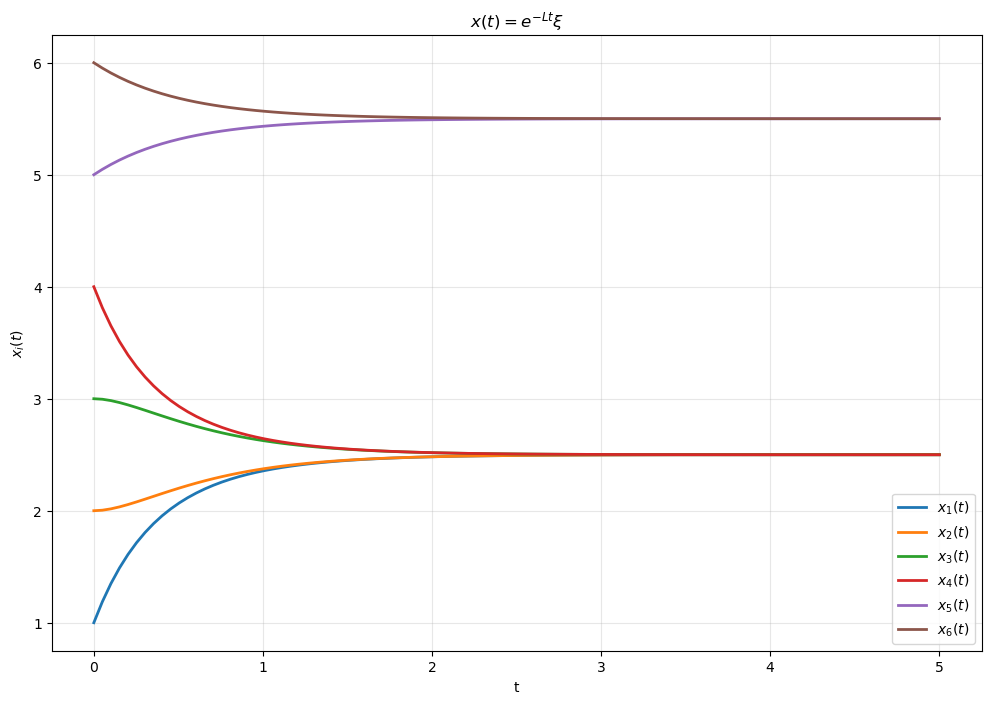

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# (a) 计算拉普拉斯矩阵 L
print("(a) 计算图拉普拉斯矩阵 L")

L = np.array([
    [ 2, -1,  0,  -1,  0,  0],
    [-1,  2, -1,  0,  0,  0],
    [ 0, -1,  2, -1,  0,  0],
    [ -1,  0, -1,  2, 0,  0],
    [ 0,  0,  0, 0,  1, -1],
    [ 0,  0,  0,  0, -1,  1]
])

print("拉普拉斯矩阵 L:")
print(L)

# (b) 计算特征值
print("\n(b) 计算 L 的特征值")
eigenvalues = np.linalg.eigvals(L)
eigenvalues_rounded = np.round(eigenvalues, 2)

print(f"特征值: {eigenvalues_rounded}")

# (c) 计算 x(t) = e^{-Lt}ξ 并绘图
print("\n(c) 绘制 x(t) 曲线")

ξ = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)  # ξ = [1,2,3,4,5,6]^T

# 时间范围
t_values = np.linspace(0, 5, 100)
x_values = []

for t in t_values:
    # 计算矩阵指数 e^{-Lt}
    exp_matrix = expm(-L * t)
    # 计算 x(t) = e^{-Lt}ξ
    x_t = exp_matrix @ ξ
    x_values.append(x_t.flatten())

x_values = np.array(x_values)

# 绘图
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(t_values, x_values[:, i], label=f'$x_{i+1}(t)$', linewidth=2)

plt.xlabel('t')
plt.ylabel('$x_i(t)$')
plt.title('$x(t) = e^{-Lt}\\xi$ ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()